## HMG Workshop Results Data Analysis

<br/>

This notebook is an analysis on the results of Creative In-Car Media Experience Ideation Workshop. This notebook looks specifically at the responses to Question 2 in the individual ideation session of the workshop where we ask users about 


### Main Question
####  Based on the situations above, what media experiences can you have in a car ? 


<hr/>

## Contents 

1) Data Cleaning & Tags 
2) Data Exploration & Analysis

<hr/>



## 1) Data Cleaning & Tags

#### 1. We gathered all the responses (to the main question) written down in post-its from the 6 sessions of the workshop and exported them to a csv file 
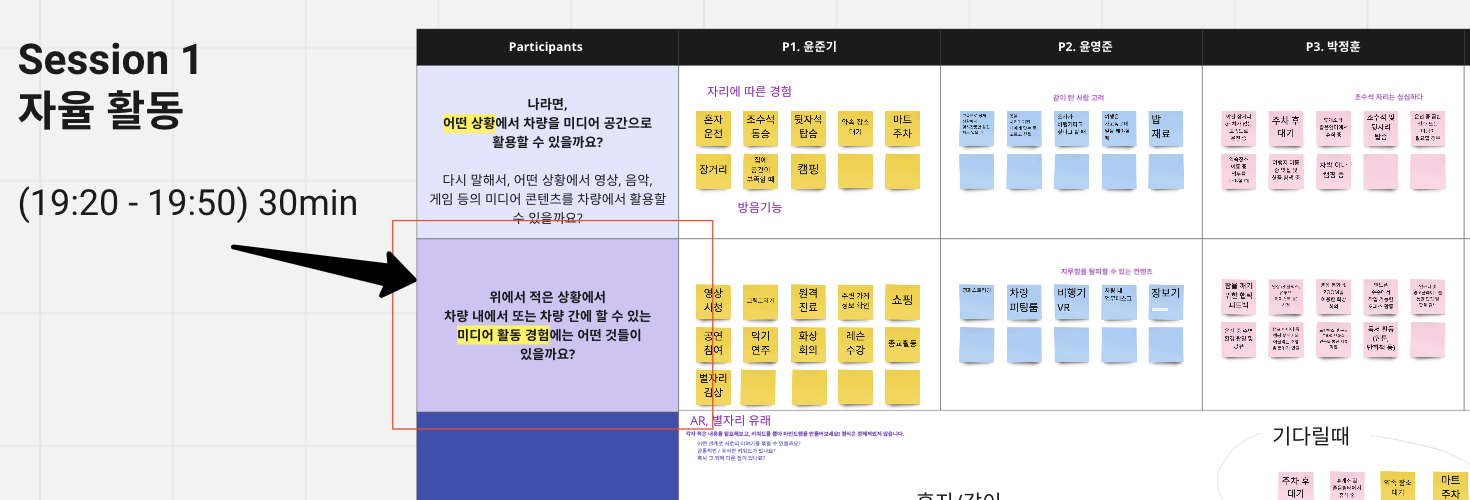

#### 2. Within the csv we gave each idea a tag based on the categories below 

    * Media_type : type of media content
    * Media_creation : whether they are a media creator or consumer
    * Theme : various themes
    * User_number : number of media users
    


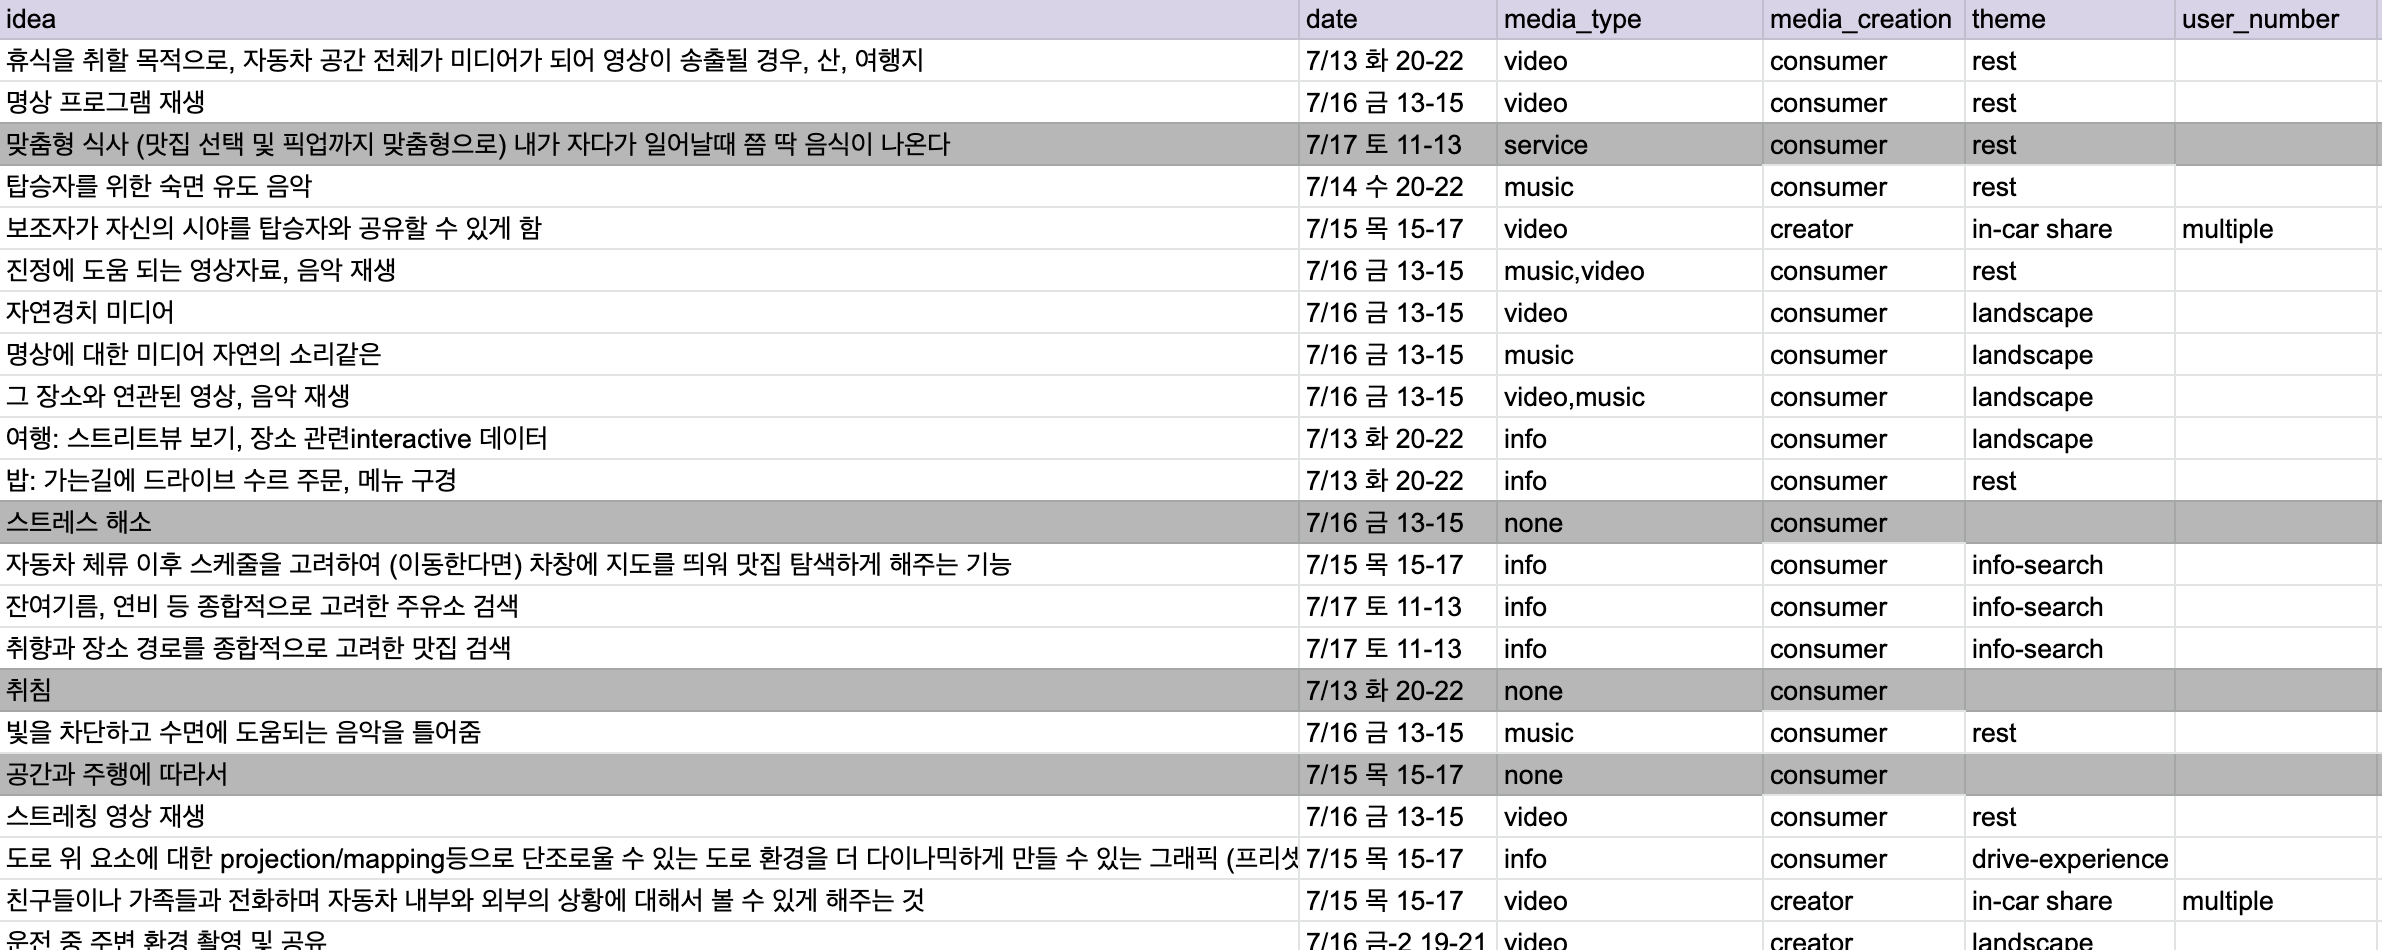


<hr/>

<br/>

## 2) Data Exploration & Analysis 

In [303]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt 

Here we import the data

In [264]:
# read csv
data= pd.read_csv('./idea.csv')
data.head()

,idea,date,media_type,media_creation,theme,user_number
0,"휴식을 취할 목적으로, 자동차 공간 전체가 미디어가 되어 영상이 송출될 경우, 산,...",7/13 화 20-22,video,consumer,rest,NaN
1,명상 프로그램 재생,7/16 금 13-15,video,consumer,rest,NaN
2,맞춤형 식사 (맛집 선택 및 픽업까지 맞춤형으로) 내가 자다가 일어날때 쯤 딱 음식...,7/17 토 11-13,service,consumer,rest,NaN
3,탑승자를 위한 숙면 유도 음악,7/14 수 20-22,music,consumer,rest,NaN
4,보조자가 자신의 시야를 탑승자와 공유할 수 있게 함,7/15 목 15-17,video,creator,in-car share,multiple


### Data Cleaning

In [265]:
#total length of ideas
print("Total rows in raw data: ", data.shape[0])

Total rows in raw data:  132


In [266]:
data.columns

Index(['idea', 'date', 'media_type', 'media_creation', 'theme', 'user_number'], dtype='object')

In [313]:
# remove rows with media_type = none / extracting non media activities only
data_media = data[data.media_type != 'none']
print('Removed non-media activities row number: ', data_media.shape[0])

Removed non-media activities row number:  108


I removed the non-media related activities. The analysis we conduct from here on will focus soley on the media related activities. Below are some examples of non-media related activities

In [311]:
#example of non-media activity idea
data[data.media_type == 'none']

,idea,date,media_type,media_creation,theme,user_number
11,스트레스 해소,7/16 금 13-15,none,consumer,NaN,NaN
15,취침,7/13 화 20-22,none,consumer,NaN,NaN
17,공간과 주행에 따라서,7/15 목 15-17,none,consumer,NaN,NaN
27,낮잠: 어두워지다가 적절한 시간에 밝아지면 좋겠다,7/13 화 20-22,none,consumer,NaN,NaN
96,아이스브레이킹,7/16 금 13-15,none,NaN,NaN,NaN
113,진지한 대화,7/16 금 13-15,none,none,none,none
114,조용한 대화,7/16 금 13-15,none,none,none,none
115,프라이빗한 대화,7/13 화 20-22,none,none,none,none
116,운동,7/16 금 13-15,none,none,none,none
117,그림그리기,7/16 금-2 19-21,none,none,none,none


#### The Data Explorations conducted from here on look specifically at media activies only. Non-Media Activity Ideas were removed

<br/>

### Data Exploration


#### Media Types

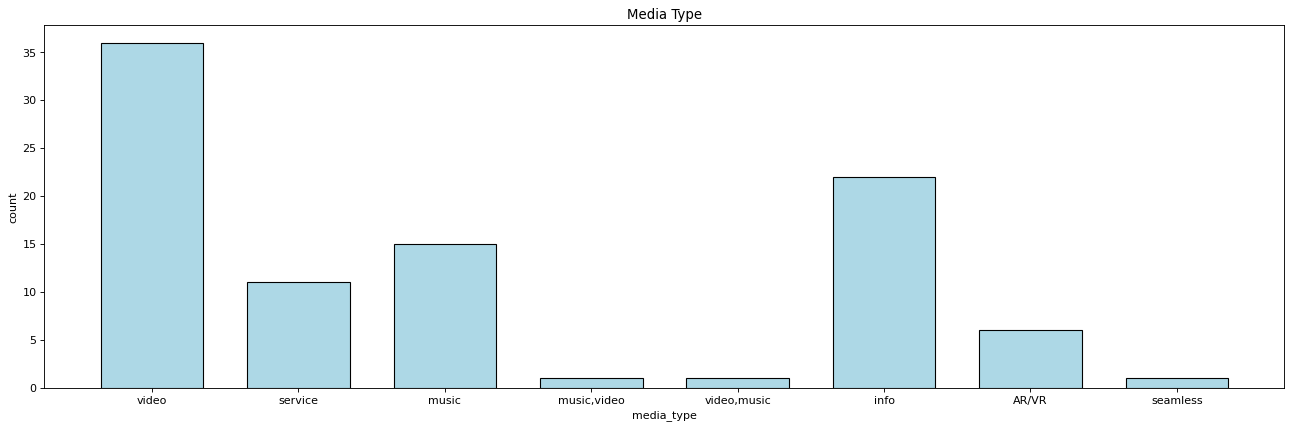

In [316]:
figure(figsize=(20, 6), dpi=80)
plt.hist(data_media['media_type'], bins=np.arange(9)-0.5, ec="k",rwidth=0.7,color='lightblue')
plt.xlabel('media_type')
plt.ylabel('count')
plt.title('Media Type')
plt.show()

From the graph above, we can see that the most popular type of media people want to see in the car are video, info, music, serivce, AR/VR

In [318]:
data_media['media_type'].value_counts()

video          36
info           22
music          15
service        11
AR/VR           6
game            6
AR/VR,game      3
haptic          2
social          2
audio           1
game,video      1
music,video     1
seamless        1
video,music     1
Name: media_type, dtype: int64

In [ ]:
We will take a deeper loo 

### Consumer Creator

Consumer vs Creator percentage 

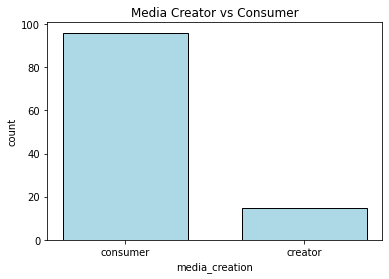

In [272]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

plt.hist(df3['media_creation'], bins=np.arange(3)-0.5, ec="k",rwidth=0.7,color='lightblue')
plt.xlabel('media_creation')
plt.ylabel('count')
plt.title('Media Creator vs Consumer')
plt.show()


In [273]:
df3['media_creation'].value_counts()

consumer    96
none        19
creator     15
Name: media_creation, dtype: int64

In [302]:
total=df3['media_creation'].shape[0]
consumers=df3[df3.media_creation == 'consumer'].shape[0]
creators= df3[df3.media_creation == 'creator'].shape[0]

print("Percentage of Media Consumer Ideas :", consumers/total )
print("Percentage of Media Creator Ideas :", creators/total )


Percentage of Media Consumer Ideas : 0.7384615384615385
Percentage of Media Creator Ideas : 0.11538461538461539


## Theme

In [274]:
da=data.dropna(subset=['theme'])
da['theme'].unique()

array(['rest', 'in-car share', 'landscape', 'info-search',
       'drive-experience', 'car-to-car', 'work', 'entertainment',
       'social media', 'in-car share,entertainment', 'recommendation',
       'in-car share,recommendation', 'none'], dtype=object)

In [276]:
da=da.reset_index()

In [277]:
#startoff with different categories
rest=0
carinside=0 
landscape=0 
infosearch=0
driveexperience=0
cartocar=0
work=0
entertainment=0
socialmedia=0
recommendation=0

# go through for loop
for i in range(len(da)):
    if 'rest' in da['theme'][i]:
        rest+=1
    if 'in-car share' in da['theme'][i]:
        carinside +=1
    if 'landscape' in da['theme'][i]:
        landscape +=1
    if 'info-search' in da['theme'][i]:
        infosearch +=1 
    if 'drive-experience' in da['theme'][i]:
        driveexperience +=1
    if 'car-to-car' in da['theme'][i]:
        cartocar+=1
    if 'work' in da['theme'][i]:
        work+=1
    if 'entertainment' in da['theme'][i]:
        entertainment +=1 
    if 'social media' in da['theme'][i]:
        socialmedia +=1 
    if 'recommendation' in da['theme'][i]:
        recommendation +=1 
                            
                            
                            
# make a dataframe 
theme_df = {'rest': rest, 'in-car share':carinside, 'landscape': landscape, 'info-search':infosearch,
       'drive-experience': driveexperience, 'car-to-car':cartocar, 'work':work, 'entertainment':entertainment,
       'social media':socialmedia ,'recommendation':recommendation,}
theme_df = pd.DataFrame(data=theme_df,index = [0])
theme_df

,rest,in-car share,landscape,info-search,drive-experience,car-to-car,work,entertainment,social media,recommendation
0,8,12,6,14,5,7,11,38,2,2


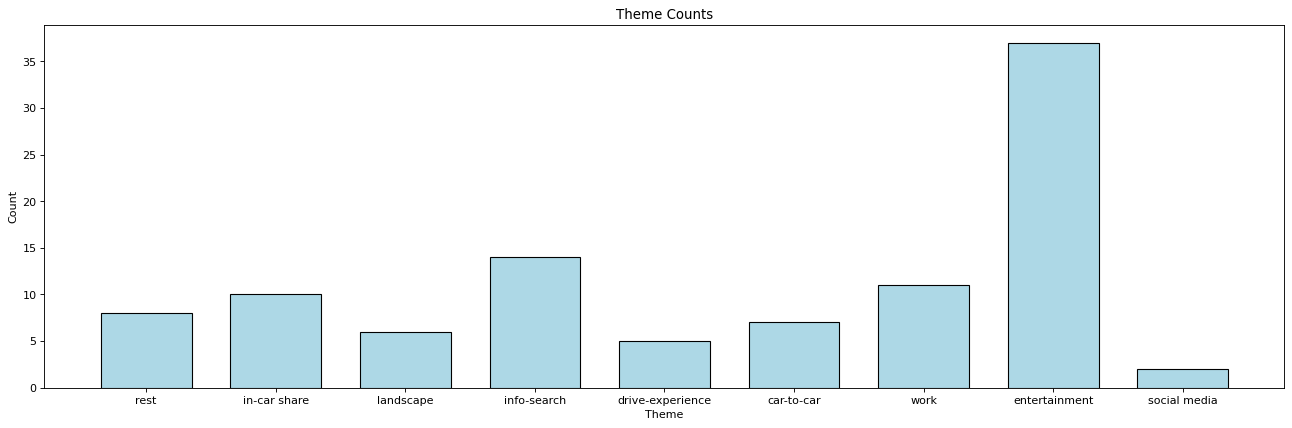

In [283]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

plt.hist(da['theme'],bins=np.arange(10)-0.5,ec="k",rwidth=0.7,color='lightblue')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.title("Theme Counts") 
plt.show()

In [284]:
da['theme'].value_counts()

entertainment                  37
none                           19
info-search                    14
work                           11
in-car share                   10
rest                            8
car-to-car                      7
landscape                       6
drive-experience                5
social media                    2
in-car share,entertainment      1
in-car share,recommendation     1
recommendation                  1
Name: theme, dtype: int64

By looking at the results of these value counts, we can see that entertainment was the most popular theme.

### Entertainment 

In [285]:
da['theme']==entertainment 

enter=da.loc[da['theme']== 'entertainment']
enter.head()

,index,idea,date,media_type,media_creation,theme,user_number
39,48,노동요 배경음악,7/17 토 11-13,music,consumer,entertainment,NaN
40,49,"콘서트와 같은 분위기로 음악 감상(예컨대, 버스와 같이 대형차량에서는 가능할 것으로...",7/13 화 20-22,music,consumer,entertainment,NaN
41,50,AR/VR을 이용한 해외여행,7/17 토 11-13,AR/VR,consumer,entertainment,NaN
42,51,막간 영상,7/17 토 11-13,video,consumer,entertainment,NaN
43,52,뉴스,7/17 토 11-13,video,consumer,entertainment,NaN


Checking out different media types for entertainment themes

In [286]:
enter['media_type'].unique()

array(['music', 'AR/VR', 'video', 'haptic', 'game,video', 'AR/VR,game',
       'game'], dtype=object)

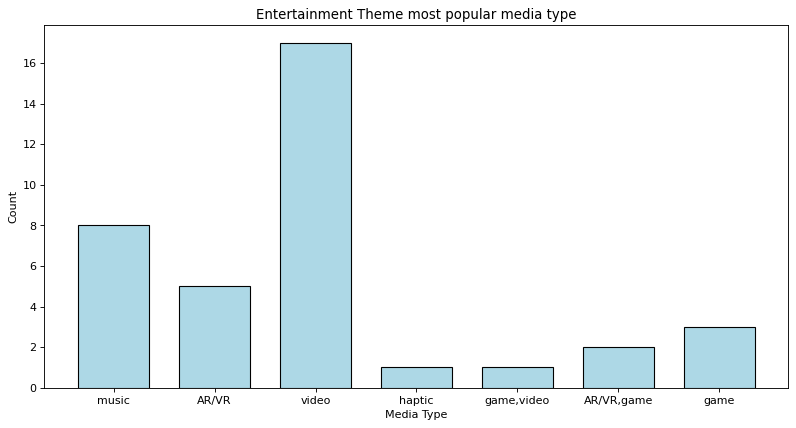

In [292]:
figure(figsize=(12, 6), dpi=80)

plt.hist(enter['media_type'],bins=np.arange(8)-0.5,ec="k",rwidth=0.7,color='lightblue')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.title("Entertainment Theme most popular media type") 
plt.show()

Looking at the results of the entertainment Theme distribution, the most popular media type was video, music, AR/VR, game service,interactive, haptic  

### List of Media Types with Entertainment

In [293]:
print("Total Number of Entertainment related ideas: ",enter['media_type'].shape[0])

Total Number of Entertainment related ideas:  37


In [294]:
enter['media_type'].value_counts()

video         17
music          8
AR/VR          5
game           3
AR/VR,game     2
game,video     1
haptic         1
Name: media_type, dtype: int64

### Entertainment -Video Ideas

In [295]:
enter.loc[enter['media_type']== 'video']

,index,idea,date,media_type,media_creation,theme,user_number
42,51,막간 영상,7/17 토 11-13,video,consumer,entertainment,NaN
43,52,뉴스,7/17 토 11-13,video,consumer,entertainment,NaN
45,54,영상 시청,7/16 금-2 19-21,video,consumer,entertainment,NaN
55,64,영화/드라마 싱크 관람,7/17 토 11-13,video,consumer,entertainment,NaN
58,67,영화 동영상 관람,7/13 화 20-22,video,consumer,entertainment,NaN
59,68,영화스트리밍,7/16 금-2 19-21,video,consumer,entertainment,NaN
60,69,캠핑을 즐기는 도중 영화관처럼 사용,7/14 수 20-22,video,consumer,entertainment,NaN
63,72,유튜브(숏 컨텐츠) 시청,7/17 토 11-13,video,consumer,entertainment,NaN
64,73,별자리 감상,7/16 금-2 19-21,video,consumer,entertainment,NaN
65,74,드라마(롱 컨텐츠) 시청,7/17 토 11-13,video,consumer,entertainment,NaN


As you can see above, there is a lot of movie,video watching ideas. People seem to be searching for enhanced ways to do watch videenter.loc[enter['media_type']== 'video']os for entertainment in the car.

### Entertainment - Music Ideas

In [296]:
enter.loc[enter['media_type']== 'music']

,index,idea,date,media_type,media_creation,theme,user_number
39,48,노동요 배경음악,7/17 토 11-13,music,consumer,entertainment,NaN
40,49,"콘서트와 같은 분위기로 음악 감상(예컨대, 버스와 같이 대형차량에서는 가능할 것으로...",7/13 화 20-22,music,consumer,entertainment,NaN
46,55,음악을 크게 틀었으면 좋겠다,7/13 화 20-22,music,consumer,entertainment,NaN
48,57,음악을 콘서트에 있는 것처럼,7/13 화 20-22,music,consumer,entertainment,NaN
50,59,음악 플레이리스트를 만들어서 추천해주는 것,7/15 목 15-17,music,consumer,entertainment,NaN
53,62,노래방,7/17 토 11-13,music,consumer,entertainment,NaN
61,70,노래방 시스템(앞유리창이 스크린으로),7/13 화 20-22,music,consumer,entertainment,NaN
62,71,공연 참여,7/16 금-2 19-21,music,consumer,entertainment,NaN


For music related ideas, the ideas are mostly related to finding a enhanced way of listening to music within the car

### Entertainment - AR/VR Ideas

In [297]:
enter.loc[enter['media_type']== 'AR/VR']

,index,idea,date,media_type,media_creation,theme,user_number
41,50,AR/VR을 이용한 해외여행,7/17 토 11-13,AR/VR,consumer,entertainment,NaN
44,53,차량 공간의 서라운딩 디스플레이 이용한 VR,7/14 수 20-22,AR/VR,consumer,entertainment,NaN
57,66,비행기 VR,7/16 금-2 19-21,AR/VR,consumer,entertainment,NaN
67,76,AR을 이용한 메타버스 아바타 꾸미기,7/17 토 11-13,AR/VR,creator,entertainment,NaN
83,92,시청각적 화려함 (현재 VR체험기 같은),7/17 토 11-13,AR/VR,consumer,entertainment,NaN


For AR/VR related media ideas, the ideas usually involved enjoyign different landscapes through VR/AR in the car. There was one idea on using AR to decorate metaverse avatars

### Entertainment - Game

In [298]:
enter.loc[enter['media_type']== 'game']

,index,idea,date,media_type,media_creation,theme,user_number
98,108,어색함을 깰 수 있는 정도의 킬링타임용 아주 간단한 미니게임 (피카츄배구 수준),7/15 목 15-17,game,consumer,entertainment,multiple
101,111,레이싱게임,7/17 토 11-13,game,consumer,entertainment,NaN
102,112,대전 또는 협업게임,7/17 토 11-13,game,consumer,entertainment,multiple


### Entertainment - Overlapping Ideas

In [299]:
enter.loc[(enter['media_type']!= 'AR/VR') & (enter['media_type']!= 'video')& (enter['media_type']!= 'music')& (enter['media_type']!= 'game')]

,index,idea,date,media_type,media_creation,theme,user_number
66,75,울퉁불퉁한 길을 달리면서 발생하는 힘/햅틱 자극에 맞는 영상 시청,7/14 수 20-22,haptic,consumer,entertainment,NaN
82,91,"게임, 스포츠, 영화 콘텐츠 제공",7/16 금 13-15,"game,video",consumer,entertainment,NaN
96,106,플레이 타임이 짧은 Ar 게임,7/15 목 15-17,"AR/VR,game",consumer,entertainment,multiple
100,110,차량의 움직임과 결합된 VR게임,7/17 토 11-13,"AR/VR,game",consumer,entertainment,NaN


## User Number 

In [115]:
data['user_number'].unique()

array([nan, 'multiple'], dtype=object)

In [117]:
data['user_number'] = data['user_number'].fillna('single/unknown')

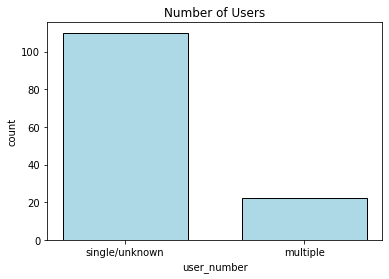

In [221]:
plt.hist(data['user_number'],  bins=np.arange(3)-0.5, ec="k",rwidth=0.7,color='lightblue')
plt.xlabel('user_number')
plt.ylabel('count')
plt.title('Number of Users')
plt.show()

In [222]:
data['user_number'].value_counts()

single/unknown    110
multiple           22
Name: user_number, dtype: int64